In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [99]:
files = glob.glob('../Output/BASE/*.csv')
files.sort()

In [100]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/BASE/BreastC Silhouette.csv',
 1: '../Output/BASE/BreastC acc.csv',
 2: '../Output/BASE/BreastC adjMI.csv',
 3: '../Output/BASE/BreastC cluster GMM.csv',
 4: '../Output/BASE/BreastC cluster Kmeans.csv',
 5: '../Output/BASE/BreastC2D.csv',
 6: '../Output/BASE/CreditCardF Silhouette.csv',
 7: '../Output/BASE/CreditCardF acc.csv',
 8: '../Output/BASE/CreditCardF adjMI.csv',
 9: '../Output/BASE/CreditCardF cluster GMM.csv',
 10: '../Output/BASE/CreditCardF cluster Kmeans.csv',
 11: '../Output/BASE/CreditCardF2D.csv',
 12: '../Output/BASE/SSE.csv',
 13: '../Output/BASE/logliklihood.csv'}

In [101]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)




## Part 1: Clustering Analyses

In [102]:
time_file="../Clustering_fit_time_BASE.csv"
dfs[14]=pd.read_csv(time_file)
print(dfs[14].head(10))


    k  BC_kmean     BC_em  CCF_kmean     CCF_em
0   2  0.376687  0.657660   2.468632   1.060555
1   3  0.531094  2.266146   0.594629   2.168069
2   4  1.141671  2.941556   0.821292   2.693500
3   5  1.786935  3.929401   1.333387   3.683939
4   6  0.943148  2.536908   3.476020  18.010258
5   7  1.678211  3.343959   2.227473   6.129113
6   8  2.546718  3.974210   2.300265  10.101580
7   9  2.119205  4.684793   1.586533  14.310441
8  10  3.106335  8.775711   2.765883  13.946128


K-means SSE - Both datasets:  **dfs[12]**

GMM Loglikelihood - Both datasets:  **dfs[13]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

NN GMM cluster - BreastC:  **dfs[3]**

NN Kmeans cluster - BreastC:  **dfs[4]**

Visualize dataset in 2D - Breast C:  **dfs[5]**

Silhouette - Faults:  **dfs[6]** 

acc - Faults:  **dfs[7]**

adjMI - Faults:  **dfs[8]**

NN GMM cluster - Faults:  **dfs[9]**

NN Kmeans cluster - Faults:  **dfs[10]**

Visualize dataset in 2D - Faults:  **dfs[11]**

In [103]:
km_SSE = dfs[12]
gmm_log = dfs[13]
bc_ss = dfs[0].T[1:]
bc_ari = dfs[1].T[1:]
bc_NMI = dfs[2].T[1:]
bc_nn_gmm = dfs[3]
bc_nn_km = dfs[4]
bc_2d = dfs[5]
ccf_ss = dfs[6].T[1:]
ccf_ari = dfs[7].T[1:]
ccf_NMI = dfs[8].T[1:]
ccf_nn_gmm = dfs[9]
ccf_nn_km = dfs[10]
ccf_2d = dfs[11]


In [104]:
fit_time=dfs[14]
fit_time.columns=["k","BC_kmean","BC_EM", "CCF_kmean", "CCF_EM"]
bc_kmean_fit_time= fit_time["BC_kmean"]
bc_em_fit_time= fit_time["BC_EM"]
ccf_kmean_fit_time= fit_time["CCF_kmean"]
ccf_em_fit_time= fit_time["CCF_EM"]
cluster_number= fit_time["k"]

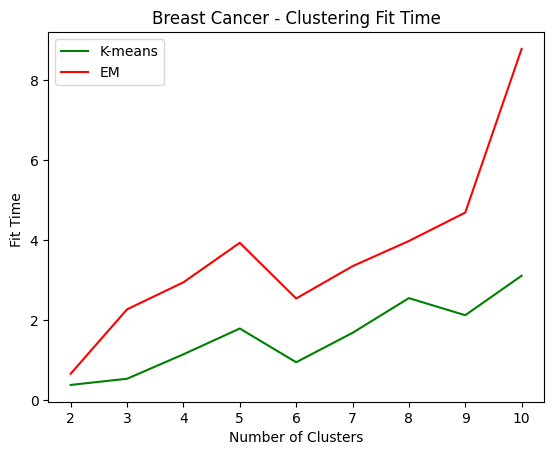

In [105]:
plt.plot(cluster_number,bc_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,bc_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Breast Cancer - Clustering Fit Time')
plt.savefig('Breast Cancer - Clustering Fit Time')

plt.show()

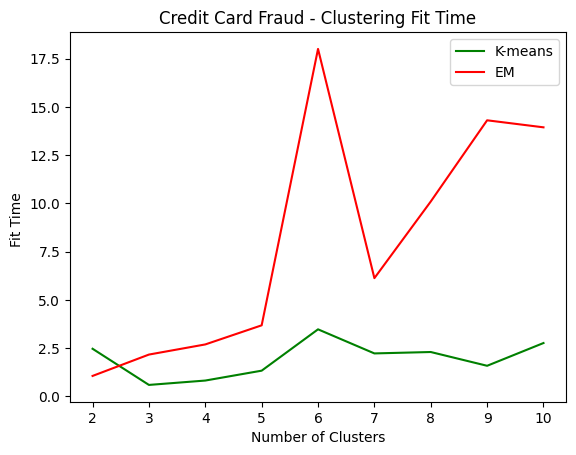

In [127]:
plt.plot(cluster_number,ccf_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,ccf_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Credit Card Fraud - Clustering Fit Time')
plt.savefig('Credit Card Fraud - Clustering Fit Time')

plt.show()

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [107]:
km_SSE.columns = ['clusters','ccf_sse', 'bc_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
ccf_y = km_SSE['ccf_sse']
km_SSE.head()

,clusters,ccf_sse,bc_sse
0,2,16582.636127,9141.635757
1,3,14585.249046,7919.072251
2,4,12853.847188,7272.895476
3,5,11512.135331,6685.327054
4,6,10931.191694,6264.173111


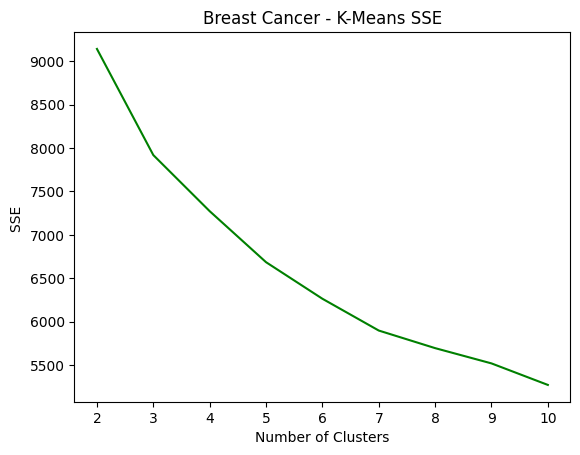

In [108]:
plt.plot(x,bc_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")

plt.title('Breast Cancer - K-Means SSE')
plt.savefig('Breast Cancer - K-Means SSE')


plt.show()

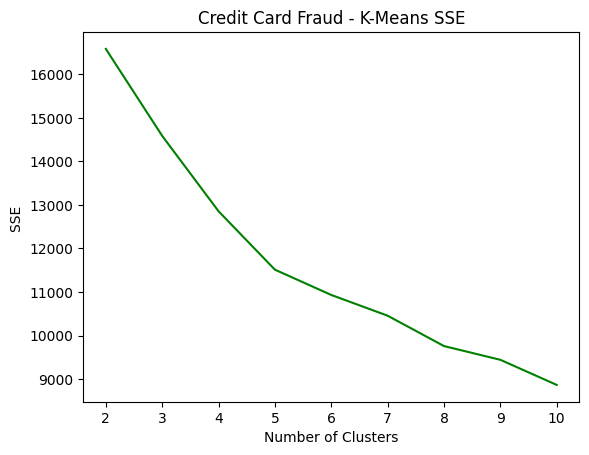

In [109]:
plt.plot(x,ccf_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud - K-Means SSE')
plt.savefig('Credit Card Fraud - K-Means SSE')


plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [110]:
gmm_log.columns = ['clusters','ccf_log','bc_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
ccf_y = gmm_log['ccf_log']
gmm_log.head()

,clusters,ccf_log,bc_log
0,2,-15.796268,0.632389
1,3,-5.222859,3.053271
2,4,-3.559375,5.495579
3,5,0.164371,9.659070
4,6,12.023625,11.405639


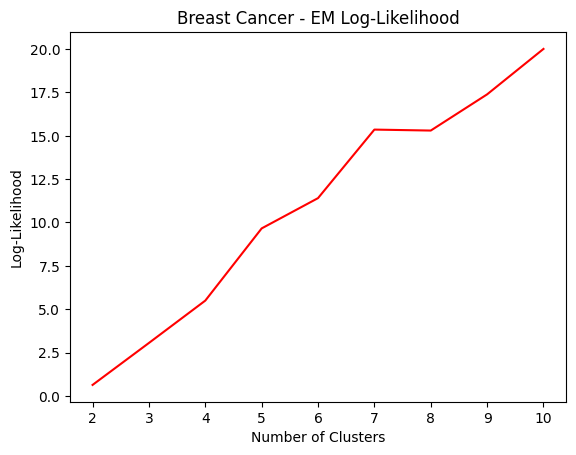

In [111]:
plt.plot(x,bc_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - EM Log-Likelihood')
plt.savefig('Breast Cancer - EM Log-Likelihood')
plt.show()



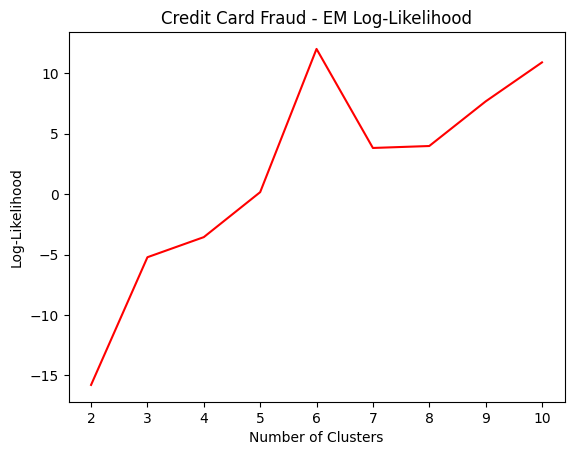

In [112]:
plt.plot(x,ccf_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud - EM Log-Likelihood')
plt.savefig('Credit Card Fraud - EM Log-Likelihood')


plt.show()


# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [113]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.319758,0.346357,2
3,0.293224,0.319629,3
4,0.146783,0.290478,4
5,0.135201,0.168952,5
6,0.156291,0.16732,6


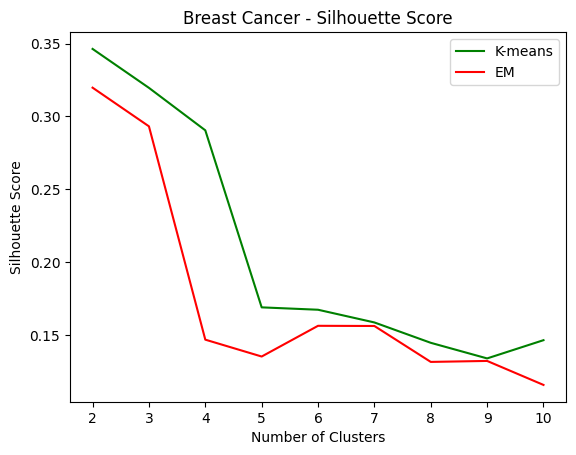

In [114]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Silhouette Score')
plt.legend()
plt.savefig('Breast Cancer - Silhouette Score')

plt.show()



## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [115]:
bc_ari['clusters'] = bc_ari.index
bc_ari.columns = ['gmm_ari','km_ari','clusters']
x = bc_acc['clusters']
gmm_y = bc_ari['gmm_ari']
km_y = bc_ari['km_ari']
bc_ari.head()

,gmm_ari,km_ari,clusters
2,0.7221,0.677069,2
3,0.700053,0.599939,3
4,0.648098,0.656014,4
5,0.81463,0.721768,5
6,0.798828,0.782819,6


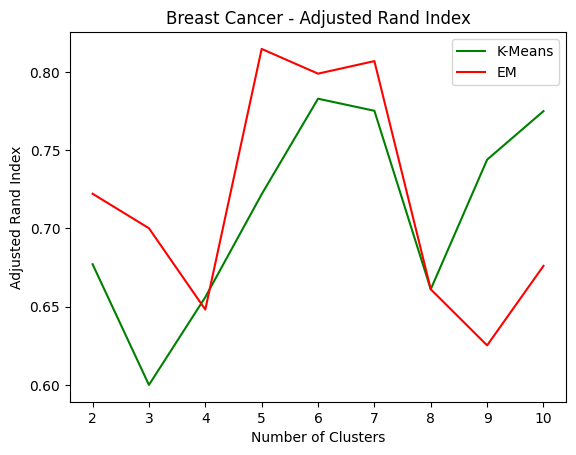

In [116]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Adjusted Rand Index')
plt.legend()
plt.savefig('Breast Cancer - Adjusted Rand Index')
plt.show()




## Normalized MI: K-Means and EM

In [117]:
bc_NMI['clusters'] = bc_NMI.index
bc_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = bc_NMI['clusters']
gmm_y = bc_NMI['gmm_NMI']
km_y = bc_NMI['km_NMI']

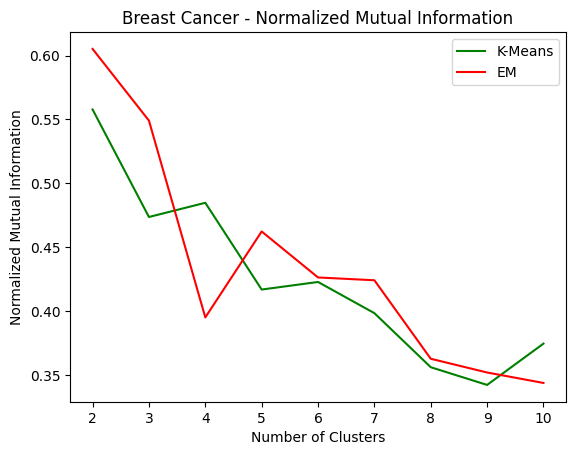

In [118]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer - Normalized Mutual Information')
plt.legend()
plt.savefig('Breast Cancer - Normalized Mutual Information')
plt.show()




# Credit Card Fraud Dataset

## Silhouette Score: K-Means and EM

In [119]:
ccf_ss['clusters'] = ccf_ss.index
ccf_ss.columns = ['gmm_ss','km_ss','clusters']
x = ccf_ss['clusters']
gmm_y = ccf_ss['gmm_ss']
km_y = ccf_ss['km_ss']
ccf_ss.head()

,gmm_ss,km_ss,clusters
2,0.430079,0.441645,2
3,0.102407,0.412377,3
4,0.114468,0.253708,4
5,0.114821,0.252425,5
6,0.081354,0.259455,6


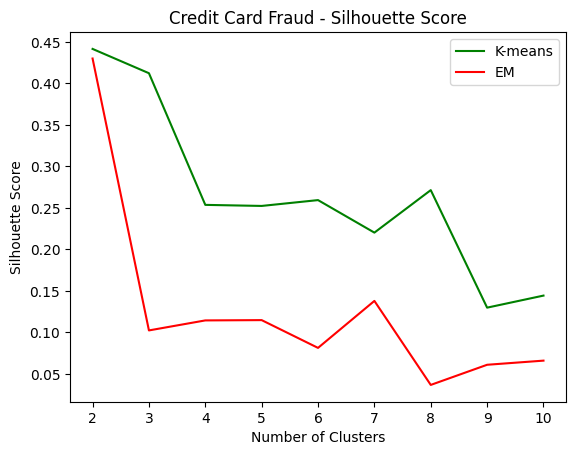

In [120]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud - Silhouette Score')
plt.legend()
plt.savefig('Credit Card Fraud - Silhouette Score')
plt.show()








## Cluster Evaluation 
## Adjusted Rand Index (ARI) Score: K-Means and EM

In [121]:
ccf_ari['clusters'] = ccf_ari.index
ccf_ari.columns = ['gmm_ari','km_ari','clusters']
x = ccf_ari['clusters']
gmm_y = ccf_ari['gmm_ari']
km_y = ccf_ari['km_ari']
ccf_ari.head()

,gmm_ari,km_ari,clusters
2,0.121446,0.114462,2
3,0.468406,0.13794,3
4,0.468406,0.598319,4
5,0.468406,0.590471,5
6,0.27187,0.57492,6


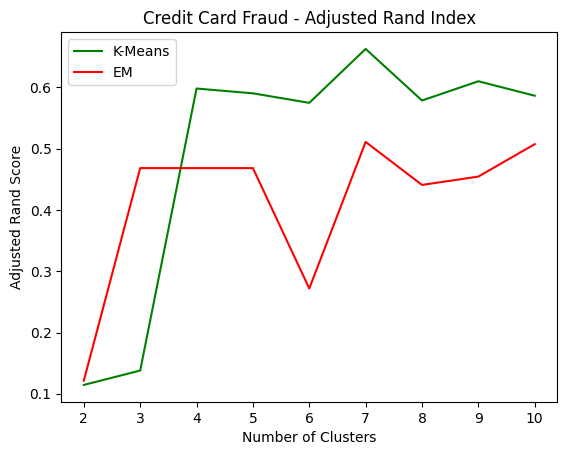

In [122]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud - Adjusted Rand Index')
plt.legend()
plt.savefig('Credit Card Fraud - Adjusted Rand Index')

plt.show()



## Normalized MI: K-Means and EM

In [123]:
ccf_NMI['clusters'] = ccf_NMI.index
ccf_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = ccf_NMI['clusters']
gmm_y = ccf_NMI['gmm_NMI']
km_y = ccf_NMI['km_NMI']

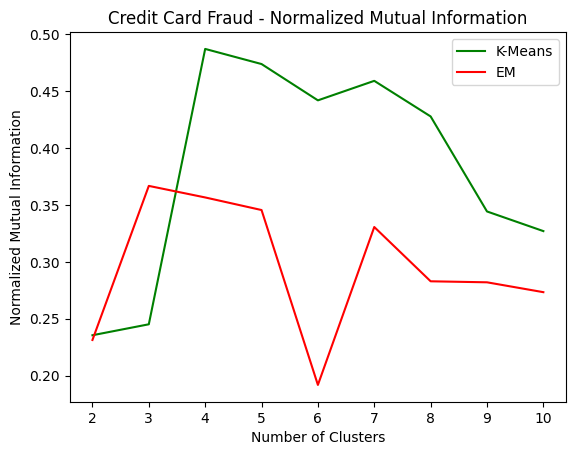

In [124]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud - Normalized Mutual Information')
plt.legend()
plt.savefig('Credit Card Fraud - Normalized Mutual Information')
plt.show()




## Part 5: Clustering and Neural Network

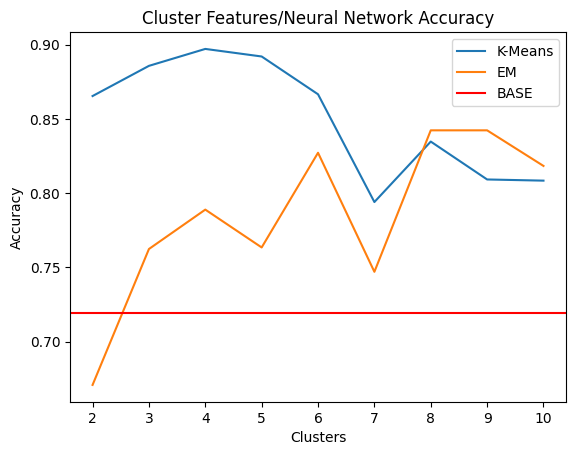

In [125]:
names = ["K-Means", "EM"]
files1 = [f_nn_km, f_nn_gmm]
files_d = dict(enumerate(files1))

for indx, f in files_d.items():
    plt.plot(f.iloc[:,7], f['mean_test_score'], label = names[indx])
plt.axhline(y=0.719, label = "BASE", color = "red")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Clusters")
plt.title('Cluster Features/Neural Network Accuracy')
plt.show()

In [126]:
f_nn_km

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_NN__alpha,param_NN__hidden_layer_sizes,param_km__n_clusters,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,1.442277,0.255459,0.000194,0.000005,0.001,"(14,)",2,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.867089,0.803797,0.885350,0.898089,0.872611,0.865387,0.032608,5
1,1,0.969241,0.448600,0.000576,0.000564,0.001,"(14,)",3,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.873418,0.848101,0.923567,0.910828,0.872611,0.885705,0.027572,3
2,2,0.539062,0.060051,0.000182,0.000003,0.001,"(14,)",4,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.892405,0.879747,0.923567,0.904459,0.885350,0.897106,0.015594,1
3,3,1.554723,0.236424,0.000301,0.000173,0.001,"(14,)",5,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.886076,0.886076,0.910828,0.910828,0.866242,0.892010,0.016986,2
4,4,1.046656,0.500499,0.000213,0.000017,0.001,"(14,)",6,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.905063,0.835443,0.821656,0.904459,0.866242,0.866573,0.034361,4
5,5,0.704575,0.085813,0.000196,0.000006,0.001,"(14,)",7,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.778481,0.905063,0.522293,0.904459,0.859873,0.794034,0.143486,9
6,6,0.620373,0.188352,0.000190,0.000003,0.001,"(14,)",8,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.867089,0.867089,0.681529,0.904459,0.853503,0.834734,0.078459,6
7,7,1.702994,0.325550,0.000220,0.000038,0.001,"(14,)",9,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.898734,0.860759,0.496815,0.910828,0.878981,0.809224,0.157135,7
8,8,1.480376,0.409192,0.000191,0.000004,0.001,"(14,)",10,"{'NN__alpha': 0.001, 'NN__hidden_layer_sizes':...",0.879747,0.500000,0.923567,0.885350,0.853503,0.808433,0.155833,8
